## Importing packages

In [59]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

## Loading the dataset

#### The data used for this project was located in the river_water_parameters.csv file. To better manipulate and analyse this file, it was loaded into a Pandas data frame using the Pandas function, .read_csv() 

In [47]:
# loading dataset

df = pd.read_csv('river_water_parameters.csv')

In [48]:
# Show sample of the dataset

df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


In [49]:
# Display number of rows and columns of the dataframe

df.shape

(219, 16)

#### The dataset consists of 219 rows (observations) and 16 columns (features)

In [50]:
# Display summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

## Data cleaning

In [51]:
# Change column names 

# Renaming columns
df = df.rename(columns={'Date (DD/MM/YYYY)': 'Date', 
                        'Time (24 hrs XX:XX)': 'Time', 
                        'Ambient temperature (°C)': 'Ambient temperature',
                        'Sample temperature (°C)': 'Sample temperature', 
                        'EC\n(µS/cm)': 'EC', 
                        'TDS\n(mg/L)': 'TDS',
                        'TSS\n(mL sed/L)': 'TSS', 
                        'DO\n(mg/L)': 'DO', 
                        'Level\n(cm)': 'Level',
                        'Turbidity (NTU)': 'Turbidity', 
                        'Hardness\n(mg CaCO3/L)': 'Hardness', 
                        'Total Cl-\n(mg Cl-/L)': 'Total Cl'})

In [52]:
# Check null values

df.isna().sum()

Date                        0
Time                        0
Sampling point              0
Ambient temperature         0
Ambient humidity            0
Sample temperature          0
pH                          0
EC                          0
TDS                         0
TSS                         6
DO                          0
Level (cm)                 39
Turbidity                   1
Hardness                    2
Hardness classification     2
Total Cl                    6
dtype: int64

#### The columns TSS, Level, Turbidity, Hardness, Hardness classification and Total Cl have null values. The level column has the highest number of null values (36)

In [53]:
# Imputing the null values for each column

# Fill missing TSS\n(mL sed/L) with the mean TSS
df['TSS'] = df['TSS'].fillna(df['TSS'].mean())

# Fill missing Level values with 0
df['Level (cm)'] = df['Level (cm)'].fillna(0)

# Fill missing Turbidity (NTU) with the mean Turbidity
df['Turbidity'] = df['Turbidity'].fillna(df['Turbidity'].mean())

# Fill missing Hardness\n(mg CaCO3/L) with the mean Hardness\n(mg CaCO3/L)
df['Hardness'] = df['Hardness'].fillna(df['Hardness'].mean())

# Fill missing Hardness classification with the mode Hardness classification 
df['Hardness classification'] = df['Hardness classification'].fillna(df['Hardness classification'].mode())

# Fill missing Total Cl-\n(mg Cl-/L)  with the mean Total Cl-\n(mg Cl-/L) 
df['Total Cl'] = df['Total Cl'].fillna(df['Total Cl'].mean())

In [54]:
# Count number of duplicate rows

num_duplicates = df.duplicated().sum()
num_duplicates

0

#### There are no duplicated rows

In [55]:
# Count number of unique values in each column

df.nunique()

Date                        23
Time                        31
Sampling point               5
Ambient temperature         21
Ambient humidity            18
Sample temperature          89
pH                          16
EC                          90
TDS                         54
TSS                         44
DO                         179
Level (cm)                  16
Turbidity                  187
Hardness                    65
Hardness classification      2
Total Cl                    68
dtype: int64

## Exploratory Data Analysis (EDA)

In [64]:
## Change date and time oclumns to datetime types

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [65]:
# separate numerical and categorical data


num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

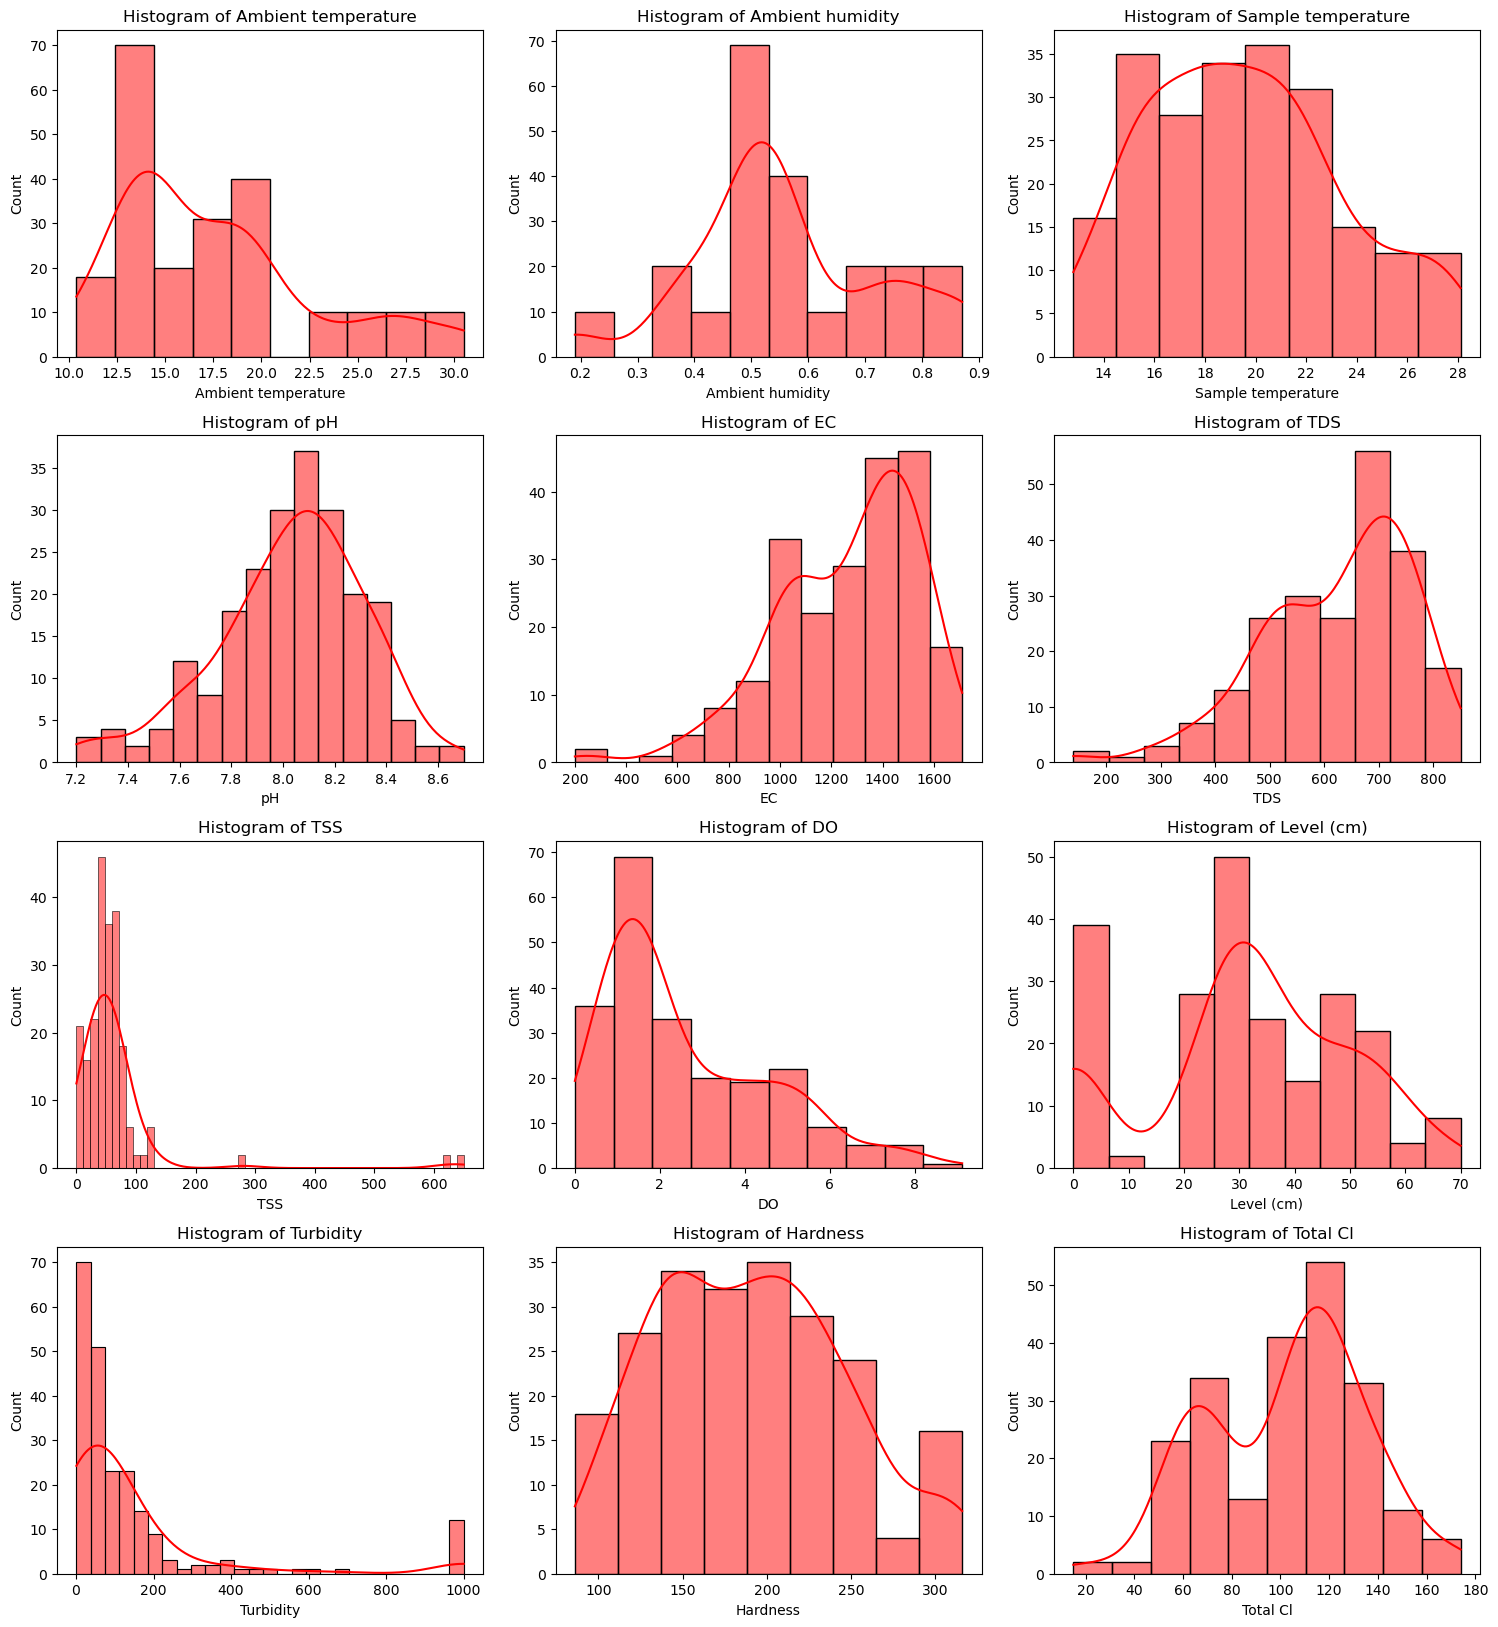

In [68]:
# Histograms for numerical columns

plt.figure(figsize = (15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde = True, color = 'red')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

#### Observations

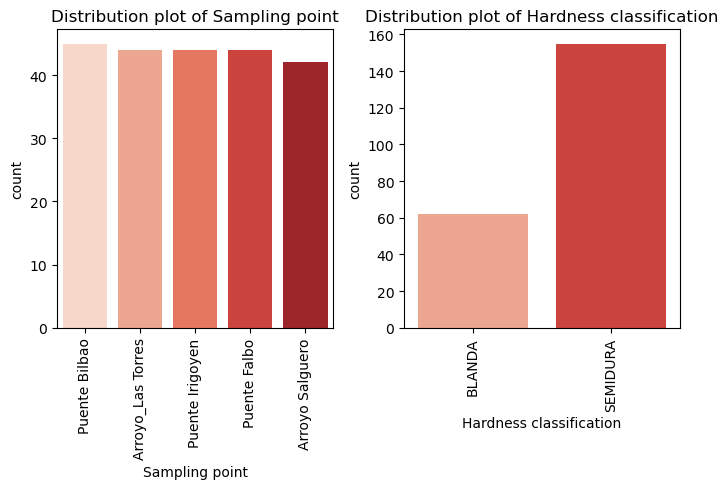

In [80]:
# Count plots for categorical columns

plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    if col != 'Time':
        plt.subplot(math.ceil(len(cat_cols) / 3), 3, i + 1)
        sns.countplot(x = df[col], palette = 'Reds')
        plt.title(f'Distribution plot of {col}')
        plt.xticks(rotation = 90)
        plt.tight_layout()
plt.show()

#### Observations

# Level

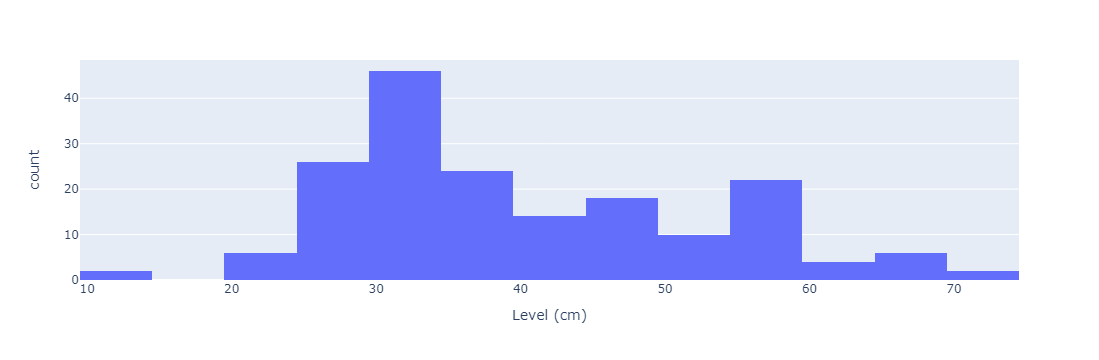

In [33]:
import plotly.express as px

fig = px.histogram(df, x="Level (cm)")
fig.show()

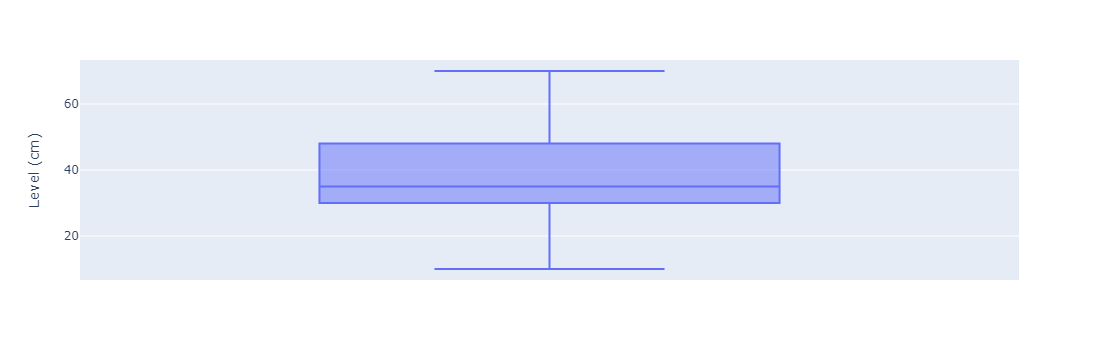

In [35]:
import plotly.express as px

fig = px.box(df, y="Level (cm)")
fig.show()

Imputing the nulls values with the median since the data is skewed

In [77]:
df['Level (cm)'] = df['Level (cm)'].fillna(df['Level (cm)'].median())

# TSS\n(mL sed/L) 

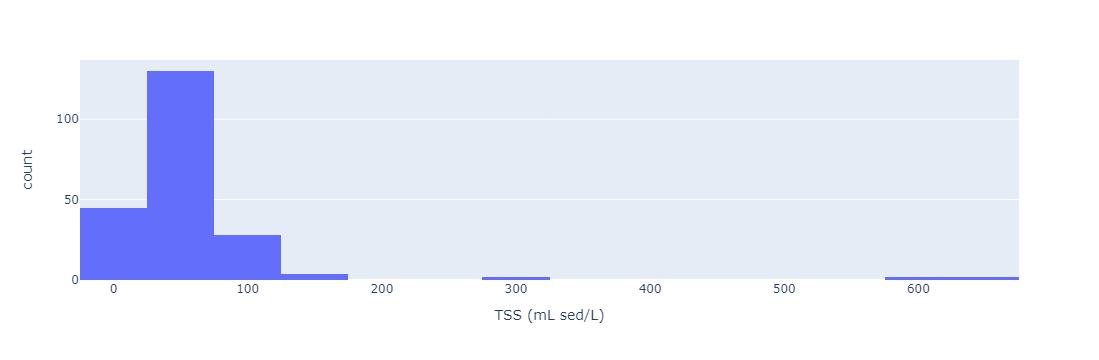

In [41]:
import plotly.express as px

fig = px.histogram(df, x="TSS\n(mL sed/L)")
fig.show()

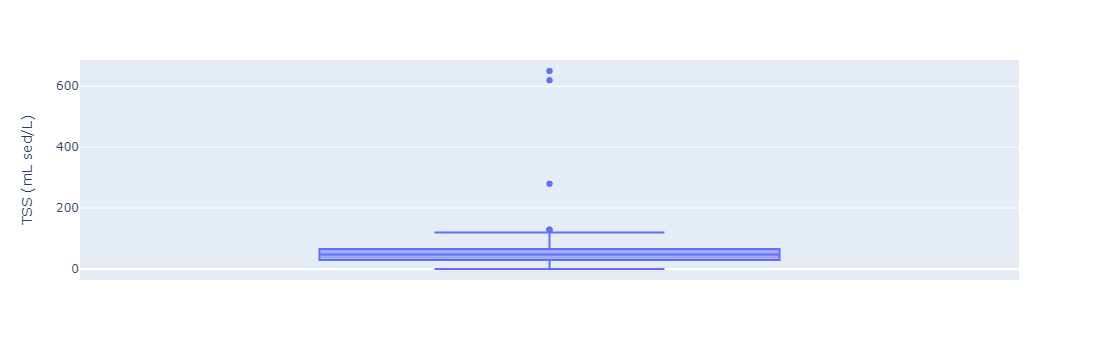

In [43]:
import plotly.express as px

fig = px.box(df, y="TSS\n(mL sed/L)")
fig.show()

Imputing the nulls values with the median since the data is skewed

In [83]:
df['LTSS\n(mL sed/L)'] = df['TSS\n(mL sed/L)'].fillna(df['TSS\n(mL sed/L)'].median())

# Turbidity (NTU)    

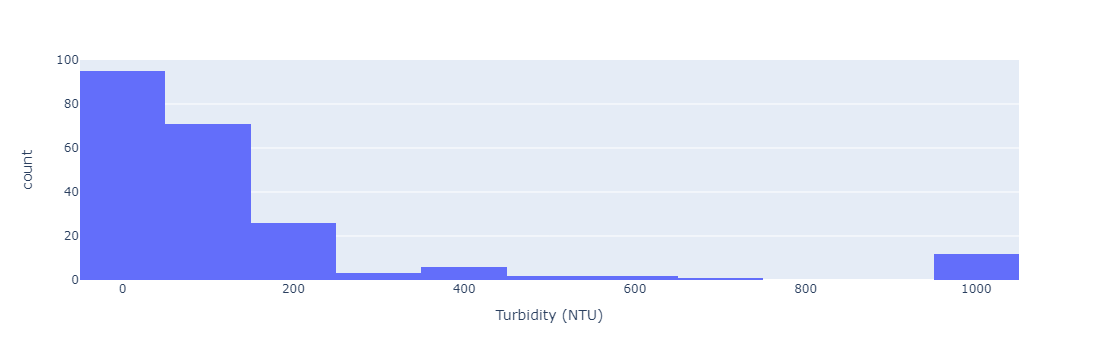

In [50]:
import plotly.express as px

fig = px.histogram(df, x="Turbidity (NTU)")
fig.show()

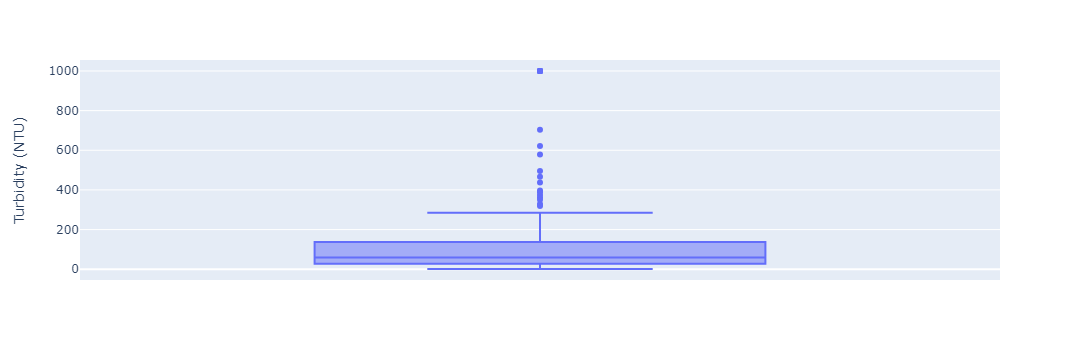

In [52]:
import plotly.express as px

fig = px.box(df, y="Turbidity (NTU)")
fig.show()

In [85]:
df['Turbidity (NTU)'] = df['Turbidity (NTU)'].fillna(0)

# Hardness\n(mg CaCO3/L) 

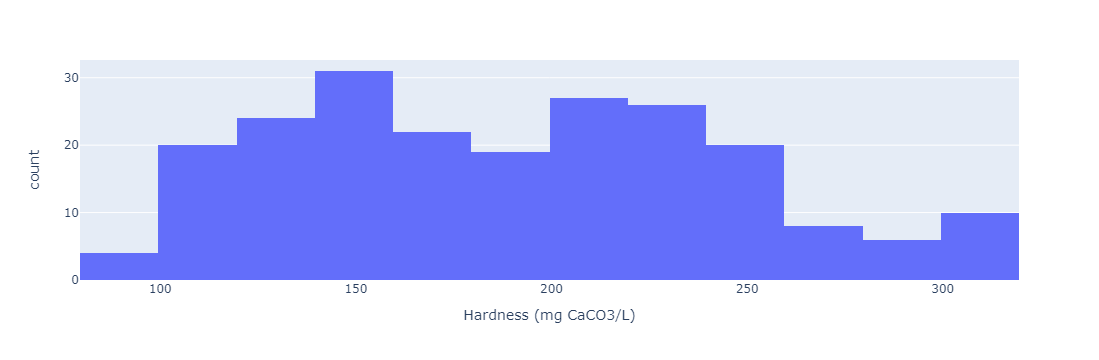

In [55]:
import plotly.express as px

fig = px.histogram(df, x="Hardness\n(mg CaCO3/L)")
fig.show()

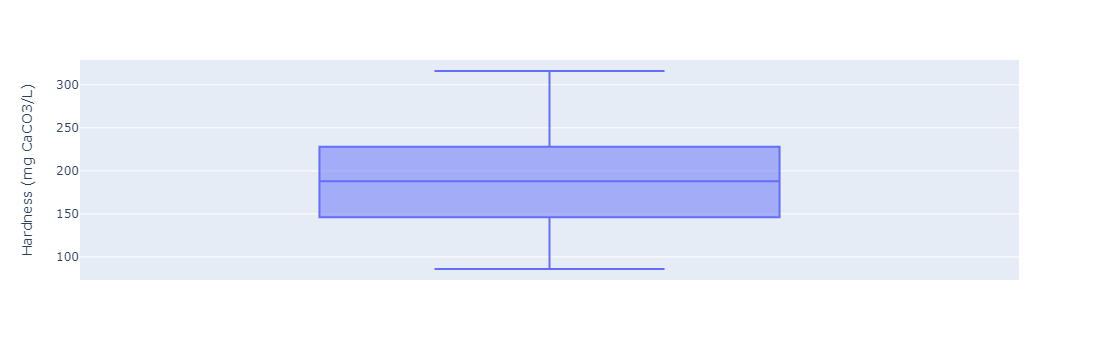

In [57]:
import plotly.express as px

fig = px.box(df, y="Hardness\n(mg CaCO3/L)")
fig.show()

In [87]:
df['Hardness\n(mg CaCO3/L)'] = df['Hardness\n(mg CaCO3/L)'].fillna(df['Hardness\n(mg CaCO3/L)'].mean())

# Hardness classification

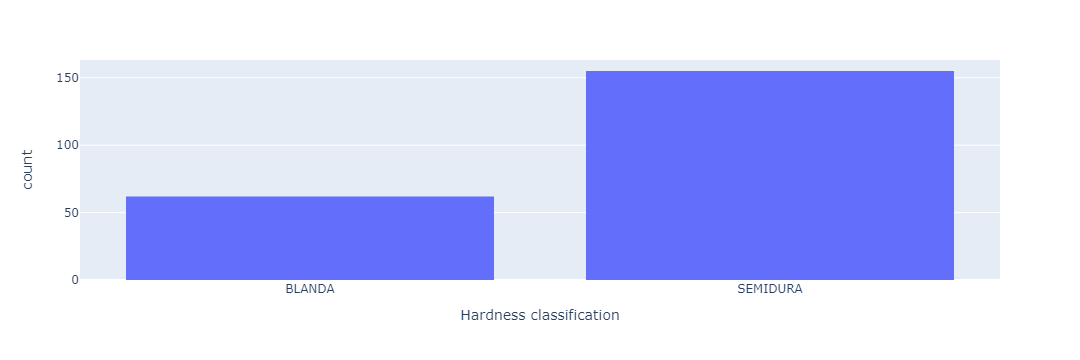

In [60]:
import plotly.express as px

fig = px.histogram(df, x="Hardness classification")
fig.show()

In [90]:
df['Hardness classification'] = df['Hardness classification'].fillna(df['Hardness classification'].mode())

# Total Cl-\n(mg Cl-/L)

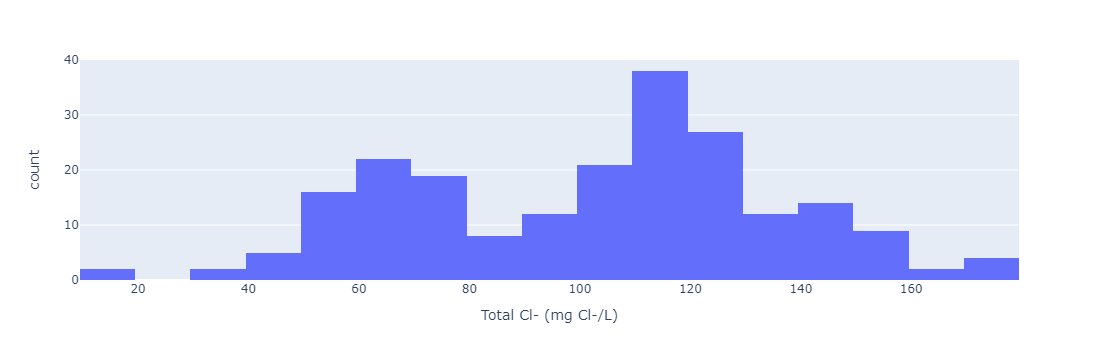

In [65]:
import plotly.express as px

fig = px.histogram(df, x="Total Cl-\n(mg Cl-/L)")
fig.show()

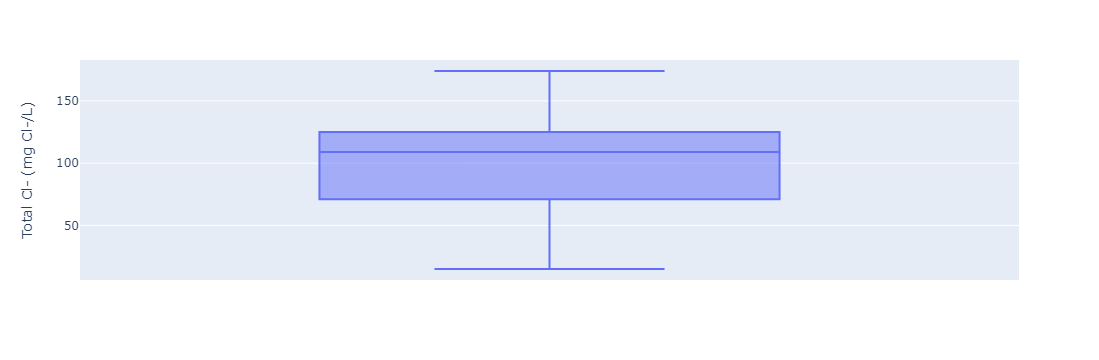

In [67]:
import plotly.express as px

fig = px.box(df, y="Total Cl-\n(mg Cl-/L)")
fig.show()

In [92]:
 df['Total Cl-\n(mg Cl-/L)'] = df['Total Cl-\n(mg Cl-/L)'].fillna(df['Total Cl-\n(mg Cl-/L)'].median())

In [ ]:
# Checking duplicates

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Total Cl-\n(mg Cl-/L)")
fig.show()